In [1]:
import os, shutil

In [2]:
# 데이터 셋 복사 및 확인
!cp -r '/content/drive/MyDrive/Colab Notebooks/2021_11_11_이미지처리_cats_dogs/cats_dogs'  '/content/'
!ls -ls '/content/cats_dogs'

total 833868
277664 -rw------- 1 root root 284321224 Nov 11 01:46 test1.zip
556204 -rw------- 1 root root 569546721 Nov 11 01:46 train.zip


In [3]:
!rm -rf '/content/datasets/'
!unzip '/content/cats_dogs/test1.zip' -d '/content/datasets/' 
!unzip '/content/cats_dogs/train.zip' -d '/content/datasets/' 

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: /content/datasets/train/dog.5499.jpg  
  inflating: /content/datasets/train/dog.55.jpg  
  inflating: /content/datasets/train/dog.550.jpg  
  inflating: /content/datasets/train/dog.5500.jpg  
  inflating: /content/datasets/train/dog.5501.jpg  
  inflating: /content/datasets/train/dog.5502.jpg  
  inflating: /content/datasets/train/dog.5503.jpg  
  inflating: /content/datasets/train/dog.5504.jpg  
  inflating: /content/datasets/train/dog.5505.jpg  
  inflating: /content/datasets/train/dog.5506.jpg  
  inflating: /content/datasets/train/dog.5507.jpg  
  inflating: /content/datasets/train/dog.5508.jpg  
  inflating: /content/datasets/train/dog.5509.jpg  
  inflating: /content/datasets/train/dog.551.jpg  
  inflating: /content/datasets/train/dog.5510.jpg  
  inflating: /content/datasets/train/dog.5511.jpg  
  inflating: /content/datasets/train/dog.5512.jpg  
  inflating: /content/datasets/train/dog.5513.jpg  
  inflating: /content/datasets/t

In [4]:
!ls -al '/content/datasets/train' | head -5
!ls -l '/content/datasets/train' | grep ^- | wc -l
!ls -al '/content/datasets/test1' | head -5
!ls -l '/content/datasets/test1' | grep ^- | wc -l

total 609264
drwxr-xr-x 2 root root 774144 Sep 20  2013 .
drwxr-xr-x 4 root root   4096 Nov 11 01:46 ..
-rw-r--r-- 1 root root  12414 Sep 20  2013 cat.0.jpg
-rw-r--r-- 1 root root  21944 Sep 20  2013 cat.10000.jpg
25000
total 304292
drwxr-xr-x 2 root root 303104 Sep 20  2013 .
drwxr-xr-x 4 root root   4096 Nov 11 01:46 ..
-rw-r--r-- 1 root root  54902 Sep 20  2013 10000.jpg
-rw-r--r-- 1 root root  21671 Sep 20  2013 10001.jpg
12500


In [5]:
# 원본 데이터셋을 압축 해제한 디렉터리 경로
ori_dataset_dir = './datasets/train'

# 소규모 데이터셋을 저장할 디렉터리
base_dir = './datasets/cats_and_dogs_small'

In [6]:
# 여러번 반복실행을 위해 디렉터리 삭제
if os.path.exists(base_dir):
    shutil.rmtree(base_dir)
os.mkdir(base_dir)

In [7]:
# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

val_dir = os.path.join(base_dir, 'validation')
os.mkdir(val_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [8]:
# 훈련용 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# 훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 검증용 고양이 사진 디렉터리
val_cats_dir = os.path.join(val_dir, 'cats')
os.mkdir(val_cats_dir)

# 검증용 강아지 사진 디렉터리
val_dogs_dir = os.path.join(val_dir, 'dogs')
os.mkdir(val_dogs_dir)

# 테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# 테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [9]:
# 처음 1,000개의 고양이 이미지를 train_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 고양이 이미지를 validation_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(val_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 고양이 이미지를 test_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 처음 1,000개의 강아지 이미지를 train_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 validation_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(val_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 test_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [10]:
print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir)))
print('훈련용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir)))

print('검증용 고양이 이미지 전체 개수:', len(os.listdir(val_cats_dir)))
print('검증용 강아지 이미지 전체 개수:', len(os.listdir(val_dogs_dir)))

print('테스트용 고양이 이미지 전체 개수:', len(os.listdir(test_cats_dir)))
print('테스트용 강아지 이미지 전체 개수:', len(os.listdir(test_dogs_dir)))

훈련용 고양이 이미지 전체 개수: 1000
훈련용 강아지 이미지 전체 개수: 1000
검증용 고양이 이미지 전체 개수: 500
검증용 강아지 이미지 전체 개수: 500
테스트용 고양이 이미지 전체 개수: 500
테스트용 강아지 이미지 전체 개수: 500


In [33]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(180, 180, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [34]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 20, 20, 128)     

In [35]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [36]:
from keras.preprocessing.image import ImageDataGenerator

# 모든 이미지를 1/255로 스케일을 조정합니다
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,  # 타깃 디렉터리
        #target_size=(150, 150),  # 모든 이미지를 150 × 150 크기로 변경
        target_size=(180, 180),  # 모든 이미지를 150 × 150 크기로 변경
        batch_size=20,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블이 필요
        class_mode='binary')

val_generator = test_datagen.flow_from_directory(
        val_dir,  
        target_size=(180, 180),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [37]:
## 경로에 이미지 데이터의 개수 
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(val_cats_dir))
num_dogs_val = len(os.listdir(val_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

print("학습용 데이터 : ", total_train)
print("검증용 데이터 : ", total_val)

학습용 데이터 :  2000
검증용 데이터 :  1000


In [39]:
batch_size = 20

history = model.fit(train_generator,
                    steps_per_epoch = total_train // batch_size, 
                    epochs=60,
                    validation_data = val_generator,
                    validation_steps = total_val // batch_size)

Epoch 1/60
100/100 [==============================] - 12s 118ms/step - loss: 0.6416 - acc: 0.6275 - val_loss: 0.6223 - val_acc: 0.6730
Epoch 2/60
100/100 [==============================] - 12s 116ms/step - loss: 0.5832 - acc: 0.6990 - val_loss: 0.5897 - val_acc: 0.6860
Epoch 3/60
100/100 [==============================] - 12s 117ms/step - loss: 0.5532 - acc: 0.7165 - val_loss: 0.5854 - val_acc: 0.6940
Epoch 4/60
100/100 [==============================] - 12s 116ms/step - loss: 0.5186 - acc: 0.7430 - val_loss: 0.6343 - val_acc: 0.6440
Epoch 5/60
100/100 [==============================] - 12s 115ms/step - loss: 0.4956 - acc: 0.7615 - val_loss: 0.5642 - val_acc: 0.7040
Epoch 6/60
100/100 [==============================] - 12s 116ms/step - loss: 0.4711 - acc: 0.7760 - val_loss: 0.6210 - val_acc: 0.6720
Epoch 7/60
100/100 [==============================] - 12s 117ms/step - loss: 0.4377 - acc: 0.7910 - val_loss: 0.5508 - val_acc: 0.7220
Epoch 8/60
100/100 [==============================] - 1

In [18]:
#model.save('cats_and_dogs_1.h5')

In [30]:
#model.save('cats_and_dogs_2.h5')

In [40]:
model.save('cats_and_dogs_3.h5')

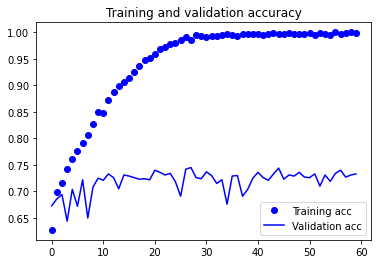

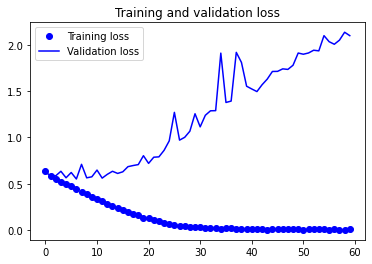

In [41]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
#학습된 모델 불러오기

In [42]:
from tensorflow.keras import models

In [43]:
one_model = models.load_model("cats_and_dogs_1.h5")
second_model = models.load_model("cats_and_dogs_2.h5")